In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from funlib.persistence import open_ds
import matplotlib.pyplot as plt
import numpy as np
import gunpowder as gp
from src.datasets import load_dataset, ZarrDataset

/home/anton/miniforge3/envs/segmentation/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ds = load_dataset("SynapseWeb/kh2015/apical")
#ds = ZarrDataset("./oblique.zarr/", "raw/s0", num_spatial_dims=3, crop_size=(50, 512, 512))

input_size = (36, 212, 212)
output_size = (12, 120, 120)

ds_it = iter(ds.request_batch(input_size, output_size))
#ds_it = iter(ds)

In [9]:
import zarr
f = zarr.open("/home/anton/.cache/autoseg/datasets/SynapseWeb/kh2015/data/apical.zarr.zip")

In [18]:
gp.Coordinate(101, 3598, 3708) / gp.Coordinate(36, 212, 212)

(1, 1, 1)

In [17]:
f["labels/s0"]

<zarr.core.Array '/labels/s0' (101, 3598, 3708) uint64>

(120, 120)
(120, 120)
(120, 120, 3)
[0. 1. 1.]


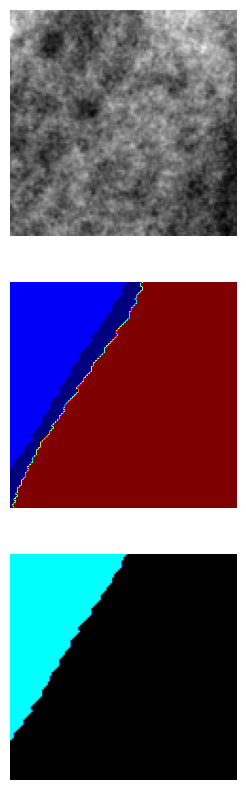

In [128]:
sample, labels, affs, affs_weights = next(ds_it)
start_end =  (212-120)//2
sample = sample[18,start_end:-start_end,start_end:-start_end]
labels = labels[6]
affs = affs[:,6,:,:].transpose(1, 2, 0).astype(np.float32)
print(sample.shape)
print(labels.shape)
print(affs.shape)
print(affs[0,0])
#print(affs)
# show 2 images both sample and labels
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
ax[0].axis("off")
ax[0].imshow(sample, cmap="gray")
ax[1].axis("off")
ax[1].imshow(labels, cmap="jet")
ax[2].axis("off")
ax[2].imshow(affs)
plt.show()

In [ ]:
#roi = gp.Coordinate(ds.shape) / 2 * ds.voxel_size 
#sample, *_ = ds[roi]
#plt.axis("off")
#plt.imshow(sample, cmap="gray");